In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd "/content/drive/MyDrive/Sales Forecasting/"
!ls

Mounted at /content/drive
/content/drive/MyDrive/Sales Forecasting
 code_1.ipynb		   'Sales Forecasting.pdf'   submission.csv
 EconomicIndicators.csv     sample_submission.csv    test.csv
'sales forecasting.ipynb'   submission_2.csv	     train.csv


## Importing library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import Lasso, Ridge,LinearRegression,SGDRegressor,BayesianRidge,PassiveAggressiveRegressor,TheilSenRegressor,RANSACRegressor,HuberRegressor,TweedieRegressor,PoissonRegressor,GammaRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, HistGradientBoostingRegressor,VotingRegressor
from sklearn.model_selection import train_test_split, learning_curve,GridSearchCV,StratifiedKFold,KFold,RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, StandardScaler,LabelEncoder,PolynomialFeatures
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from keras.models import Sequential, Model
from keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Bidirectional, Dropout, Input, GlobalMaxPooling1D, Flatten, concatenate , Permute
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.regularizers import l2
from sklearn.kernel_ridge import KernelRidge
from itertools import combinations
from tabulate import tabulate
from statsmodels.regression.quantile_regression import QuantReg
from scipy.stats import poisson, gamma, nbinom
import warnings
warnings.filterwarnings('ignore')

## Load the data

In [ ]:
train=pd.read_csv("train.csv")
sample=pd.read_csv("sample_submission.csv")
test=pd.read_csv("test.csv")
economic_data = pd.read_csv('EconomicIndicators.csv')

#clean the data or fill with it nan
train.replace(to_replace=["?", " "], value=np.nan, inplace=True)

## Analysis the data

In [ ]:
print('train data','\n''---------------------------------------\n')
print(train.info())
print('\n\n')
print('economicIndicators data','\n''---------------------------------------\n')
print(economic_data.info())
print('\n\n')
print('test data','\n''---------------------------------------\n')
print(test.info())

train data 
---------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 675 non-null    int64  
 1   Company            675 non-null    object 
 2   Quarter            675 non-null    object 
 3   QuickRatio         675 non-null    float64
 4   InventoryRatio     523 non-null    float64
 5   RevenueGrowth      675 non-null    float64
 6   MarketshareChange  675 non-null    float64
 7   Bond rating        675 non-null    object 
 8   Stock rating       675 non-null    object 
 9   Region             675 non-null    object 
 10  Industry           675 non-null    object 
 11  Sales              525 non-null    float64
dtypes: float64(5), int64(1), object(6)
memory usage: 63.4+ KB
None



economicIndicators data 
---------------------------------------

<class 'pandas.core.frame.DataFra

In [ ]:
print('train data','\n''---------------------------------------\n')
train.describe(include='all')

train data 
---------------------------------------



,ID,Company,Quarter,QuickRatio,InventoryRatio,RevenueGrowth,MarketshareChange,Bond rating,Stock rating,Region,Industry,Sales
count,675.000000,675,675,675.000000,523.000000,675.000000,675.000000,675,675,675,675,525.000000
unique,NaN,75,9,NaN,NaN,NaN,NaN,7,5,4,3,NaN
top,NaN,CMP75,Q4,NaN,NaN,NaN,NaN,AA,Sell,South,Infrastructure,NaN
freq,NaN,16,92,NaN,NaN,NaN,NaN,164,215,197,252,NaN
mean,394.555556,NaN,NaN,1.603867,4.265124,-0.009733,-0.002904,NaN,NaN,NaN,NaN,3556.708571
std,204.960069,NaN,NaN,0.595615,3.108644,0.067390,0.017622,NaN,NaN,NaN,NaN,2028.059368
min,0.000000,NaN,NaN,0.500000,1.260000,-0.200000,-0.050000,NaN,NaN,NaN,NaN,864.000000
25%,216.500000,NaN,NaN,0.990000,2.630000,-0.070000,-0.015000,NaN,NaN,NaN,NaN,1992.000000
50%,433.000000,NaN,NaN,1.730000,3.420000,0.000000,0.000000,NaN,NaN,NaN,NaN,3007.000000
75%,579.000000,NaN,NaN,2.155000,4.725000,0.050000,0.010000,NaN,NaN,NaN,NaN,4523.000000


In [ ]:
print('test data','\n''---------------------------------------\n')
test.describe(include='all')

test data 
---------------------------------------



,ID,Company,Quarter,QuickRatio,InventoryRatio,RevenueGrowth,MarketshareChange,Bond rating,Stock rating,Region,Industry
count,150.000000,150,150,150.000000,118.000000,150.000000,150.000000,150,150,150,150
unique,NaN,75,2,NaN,NaN,NaN,NaN,6,3,4,3
top,NaN,CMP01,Q8,NaN,NaN,NaN,NaN,BB,Buy,South,Infrastructure
freq,NaN,2,75,NaN,NaN,NaN,NaN,37,55,46,54
mean,340.500000,NaN,NaN,1.602867,3.962034,-0.001267,-0.002667,NaN,NaN,NaN,NaN
std,195.491765,NaN,NaN,0.585409,2.147586,0.059712,0.016330,NaN,NaN,NaN,NaN
min,7.000000,NaN,NaN,0.520000,1.390000,-0.180000,-0.050000,NaN,NaN,NaN,NaN
25%,172.000000,NaN,NaN,1.075000,2.610000,-0.040000,-0.010000,NaN,NaN,NaN,NaN
50%,340.500000,NaN,NaN,1.745000,3.505000,0.010000,0.000000,NaN,NaN,NaN,NaN
75%,509.000000,NaN,NaN,2.090000,4.575000,0.040000,0.010000,NaN,NaN,NaN,NaN


In [ ]:
train.head()

,ID,Company,Quarter,QuickRatio,InventoryRatio,RevenueGrowth,MarketshareChange,Bond rating,Stock rating,Region,Industry,Sales
0,0,CMP01,Q1,2.02,7.71,0.05,-0.04,CCC,Buy,South,Metal Fabrication,1517.0
1,1,CMP01,Q2,2.01,4.10,0.03,0.00,CCC,Hold,South,Metal Fabrication,2968.0
2,2,CMP01,Q3,2.02,6.79,0.06,-0.02,CCC,Buy,South,Metal Fabrication,1497.0
3,3,CMP01,Q4,1.98,3.97,0.01,0.02,CCC,Buy,South,Metal Fabrication,2929.0
4,4,CMP01,Q5,1.96,7.41,-0.07,0.02,CCC,Buy,South,Metal Fabrication,1452.0


In [ ]:
test.head()

,ID,Company,Quarter,QuickRatio,InventoryRatio,RevenueGrowth,MarketshareChange,Bond rating,Stock rating,Region,Industry
0,7,CMP01,Q8,1.93,2.79,-0.03,-0.01,CCC,Buy,South,Metal Fabrication
1,8,CMP01,Q9,1.93,4.77,0.00,0.00,CCC,Buy,South,Metal Fabrication
2,16,CMP02,Q8,1.97,2.34,0.04,-0.03,A,Sell,West,Infrastructure
3,17,CMP02,Q9,1.93,4.14,0.04,0.01,BBB,Hold,West,Infrastructure
4,25,CMP03,Q8,0.67,NaN,-0.05,-0.01,BB,Buy,East,Infrastructure


In [ ]:
sample.head()

,ID,Sales
0,7,200
1,8,200
2,16,200
3,17,200
4,25,200


## Analysis the data in terms of values






In [ ]:
for column in train.columns:
  print(column,'\n''---------------------------------------\n',train[column].value_counts(),'\n\n')

ID 
---------------------------------------
 540    2
597    2
595    2
594    2
590    2
      ..
230    1
229    1
228    1
227    1
674    1
Name: ID, Length: 559, dtype: int64 


Company 
---------------------------------------
 CMP75    16
CMP67    16
CMP60    16
CMP61    16
CMP62    16
         ..
CMP25     7
CMP24     7
CMP23     7
CMP22     7
CMP38     7
Name: Company, Length: 75, dtype: int64 


Quarter 
---------------------------------------
 Q4    92
Q5    92
Q6    92
Q7    92
Q1    91
Q2    91
Q3    91
Q8    17
Q9    17
Name: Quarter, dtype: int64 


QuickRatio 
---------------------------------------
 1.84    18
2.42    16
0.68    11
2.37    10
2.39    10
        ..
1.29     1
2.04     1
1.91     1
1.14     1
0.96     1
Name: QuickRatio, Length: 170, dtype: int64 


InventoryRatio 
---------------------------------------
 3.10    7
2.64    6
3.38    6
3.80    6
1.75    5
       ..
4.94    1
2.28    1
4.20    1
1.85    1
5.43    1
Name: InventoryRatio, Length: 292, dtype: 

## Calculating the number of nan values

In [ ]:
train.isna().sum()

ID                     0
Company                0
Quarter                0
QuickRatio             0
InventoryRatio       152
RevenueGrowth          0
MarketshareChange      0
Bond rating            0
Stock rating           0
Region                 0
Industry               0
Sales                150
dtype: int64

In [ ]:
test.isna().sum()

ID                    0
Company               0
Quarter               0
QuickRatio            0
InventoryRatio       32
RevenueGrowth         0
MarketshareChange     0
Bond rating           0
Stock rating          0
Region                0
Industry              0
dtype: int64

## Removing the rows which have InventoryRatio values as NaN

In [ ]:
# Fill missing values in InventoryRatio column with mean values in train data
train['InventoryRatio'] = train['InventoryRatio'].fillna(train['InventoryRatio'].mean())

print(train.isna().sum())
train.dropna(subset=['Sales'], inplace=True)
train = train.reset_index(drop=True)

print(train.isna().sum())

ID                     0
Company                0
Quarter                0
QuickRatio             0
InventoryRatio         0
RevenueGrowth          0
MarketshareChange      0
Bond rating            0
Stock rating           0
Region                 0
Industry               0
Sales                150
dtype: int64
ID                   0
Company              0
Quarter              0
QuickRatio           0
InventoryRatio       0
RevenueGrowth        0
MarketshareChange    0
Bond rating          0
Stock rating         0
Region               0
Industry             0
Sales                0
dtype: int64


In [ ]:
# Fill missing values in InventoryRatio column with mean values in test data
test['InventoryRatio'] = test['InventoryRatio'].fillna(test['InventoryRatio'].mean())

print(test.isna().sum())

ID                   0
Company              0
Quarter              0
QuickRatio           0
InventoryRatio       0
RevenueGrowth        0
MarketshareChange    0
Bond rating          0
Stock rating         0
Region               0
Industry             0
dtype: int64


## Calculating the number of duplicated values

In [ ]:
train.duplicated().sum()

0

In [ ]:
test.duplicated().sum()

0

## Analysis the train data using charts


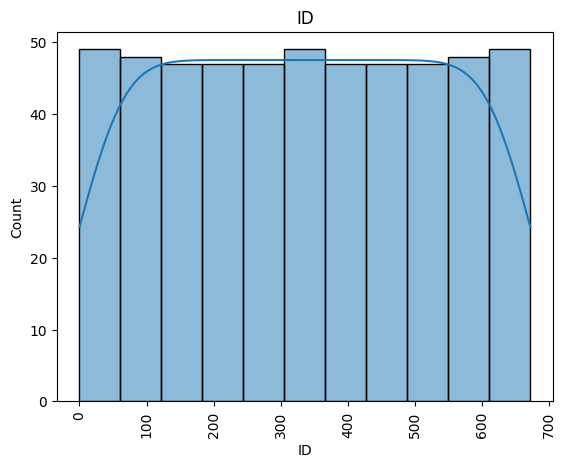

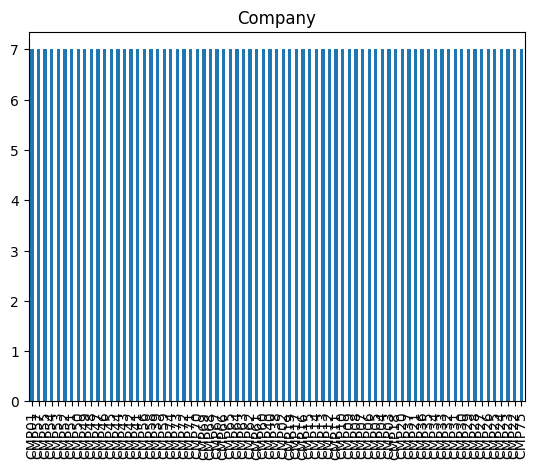

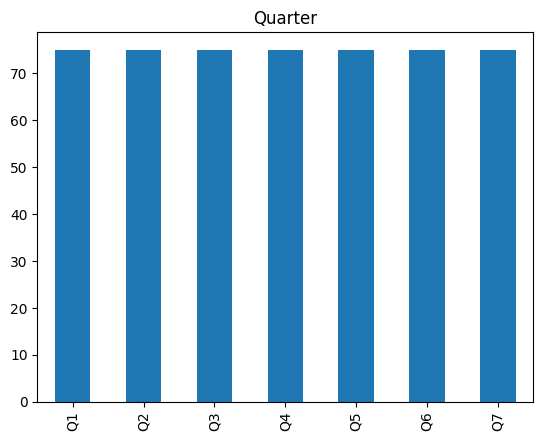

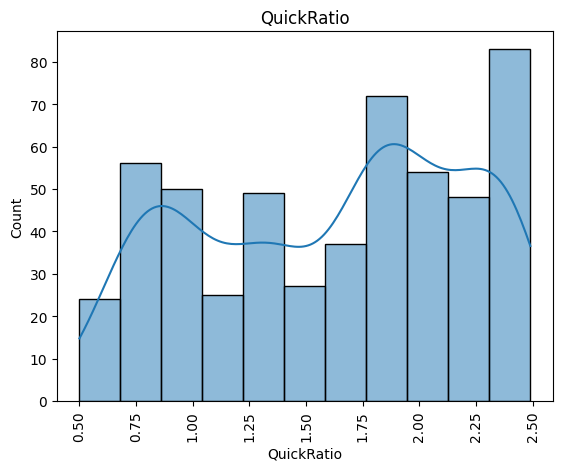

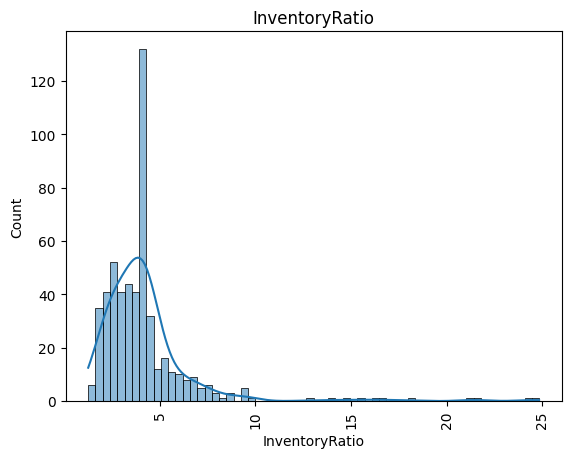

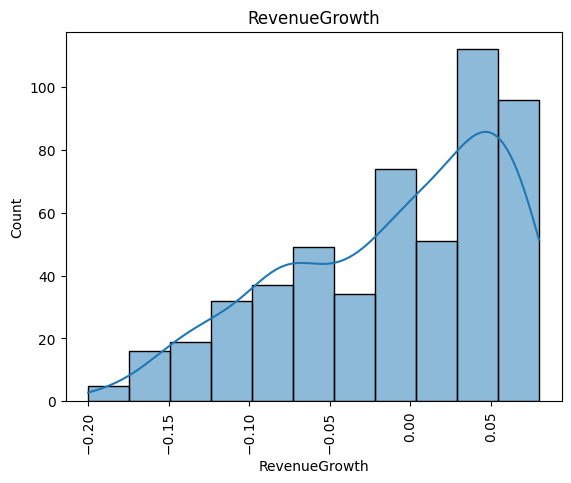

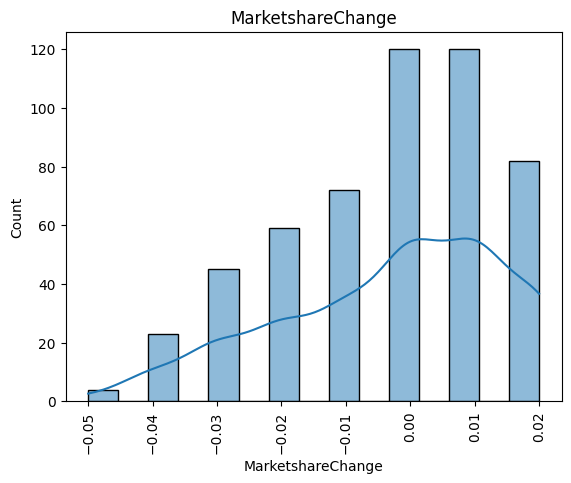

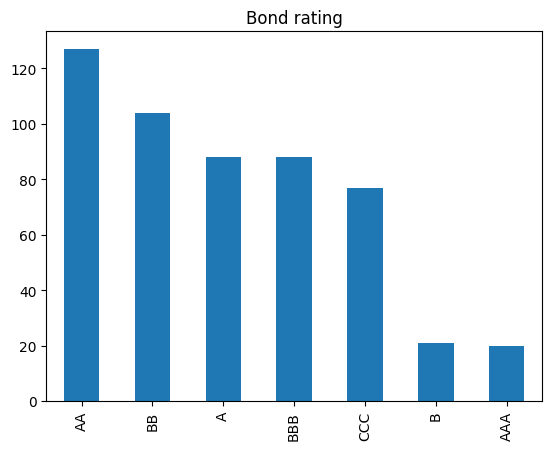

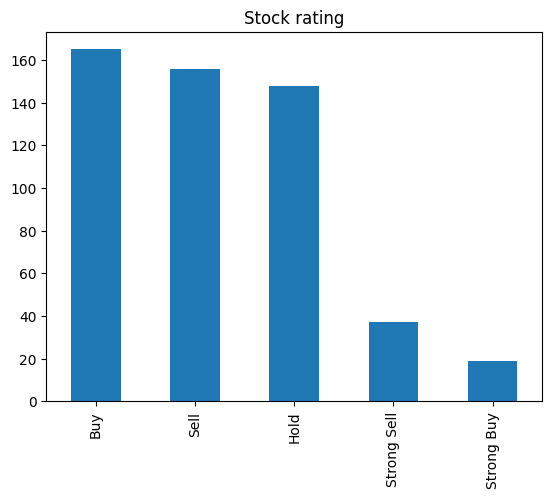

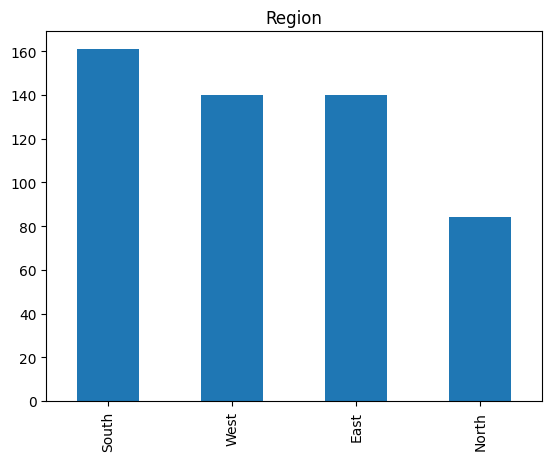

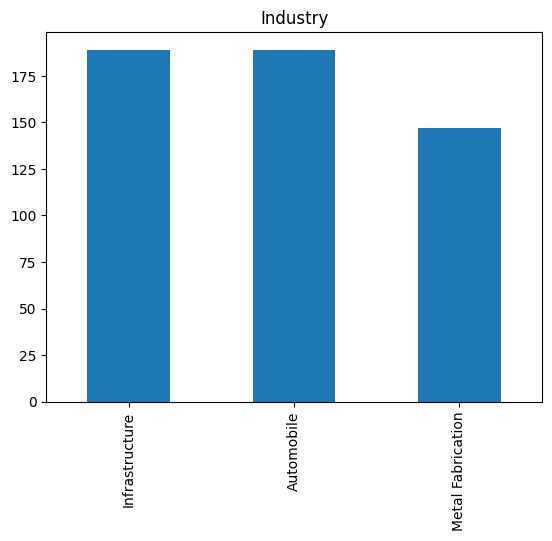

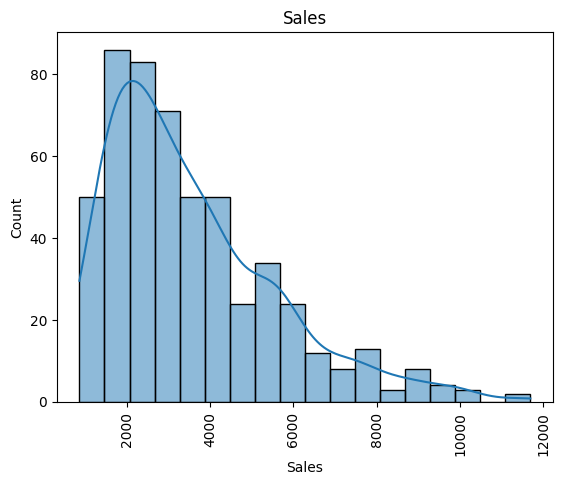

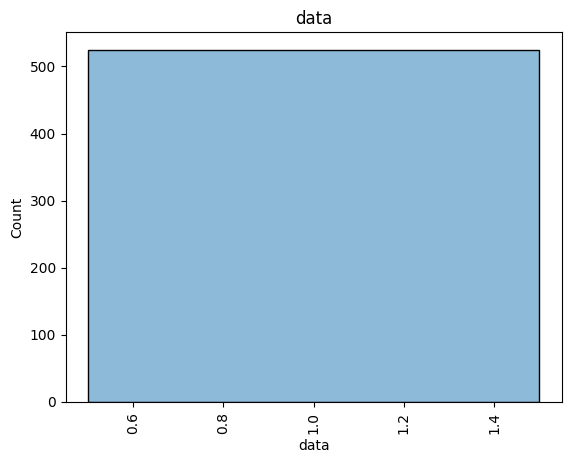

In [ ]:
for column in train.columns:
    if train[column].dtype in ['int64', 'float64']:
        sns.histplot(data = train[column], kde=True, multiple='stack')
        plt.xticks(rotation=90)
        plt.title(column)
        #plt.savefig(f"charts/{column}_barchart.png")
        plt.show()

    elif train[column].dtype == 'object':
        train[column].value_counts().plot(kind='bar')
        plt.title(column)
       #plt.savefig(f"charts/{column}_barchart.png")
        plt.show()

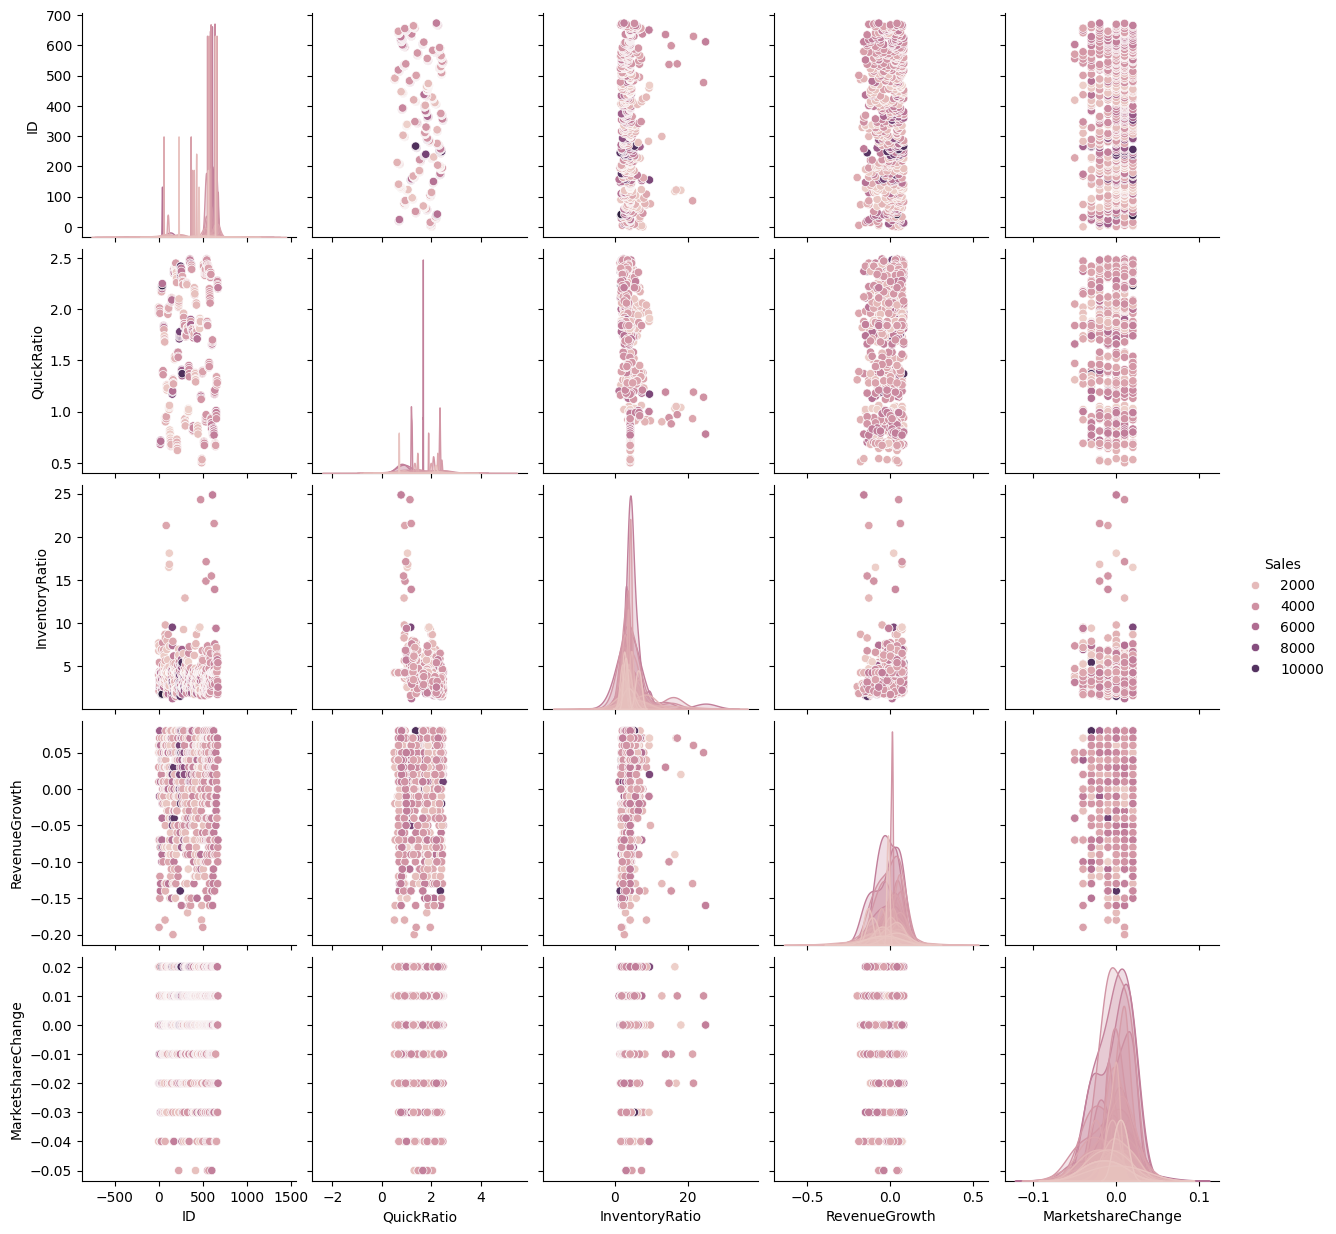

In [ ]:
sns.pairplot(train,hue='Sales', diag_kind="auto")
#plt.savefig(f"charts/pairplot.png")

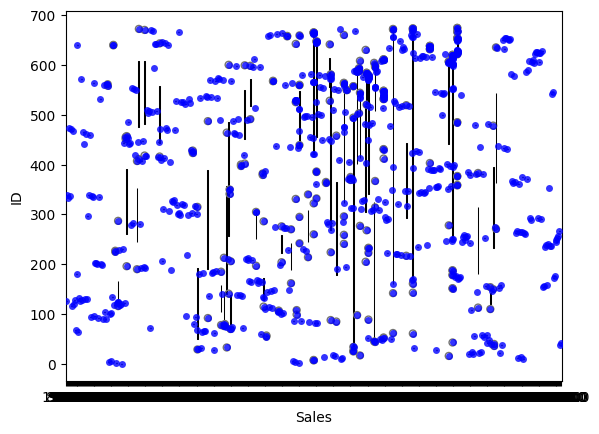

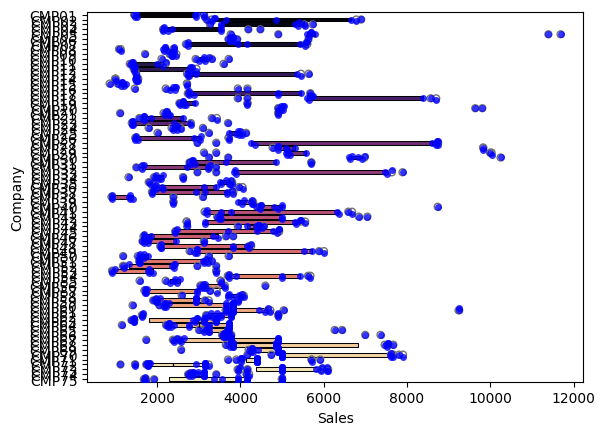

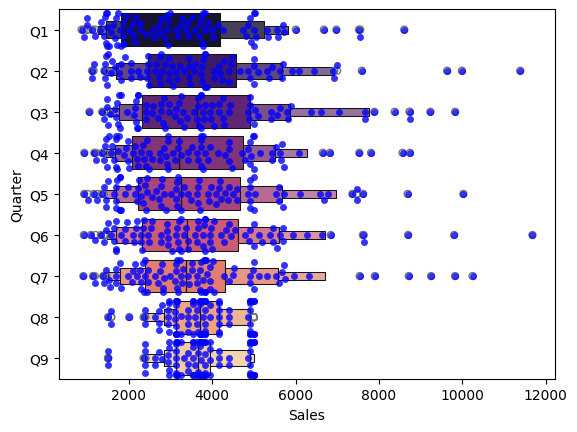

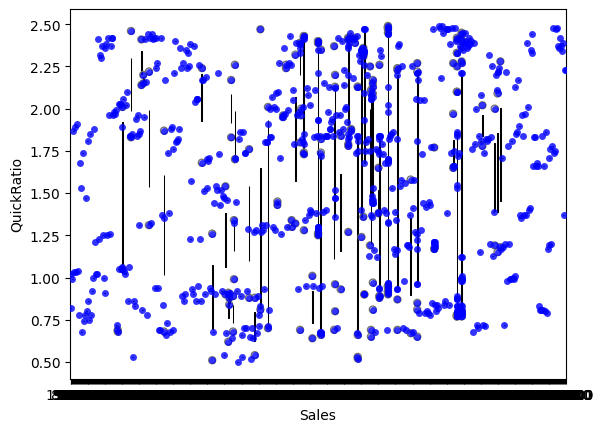

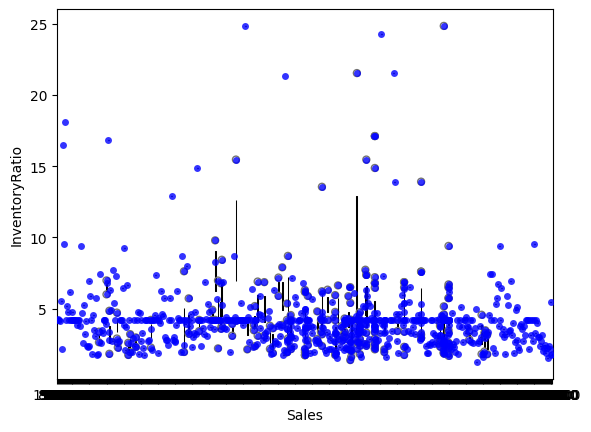

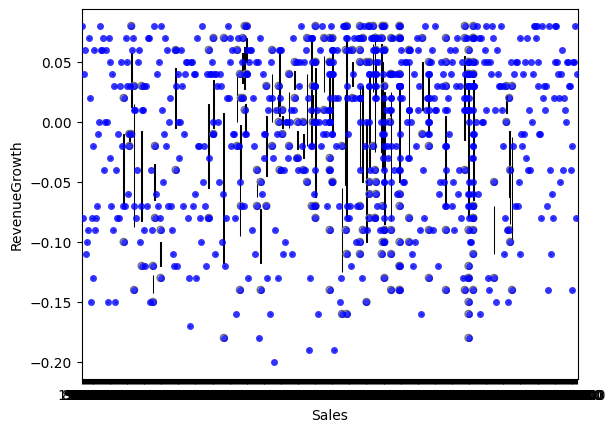

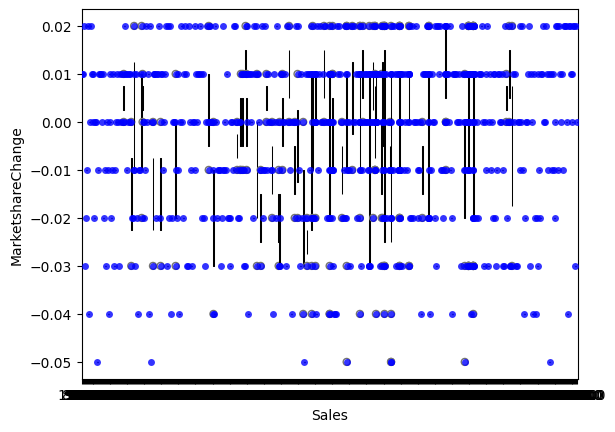

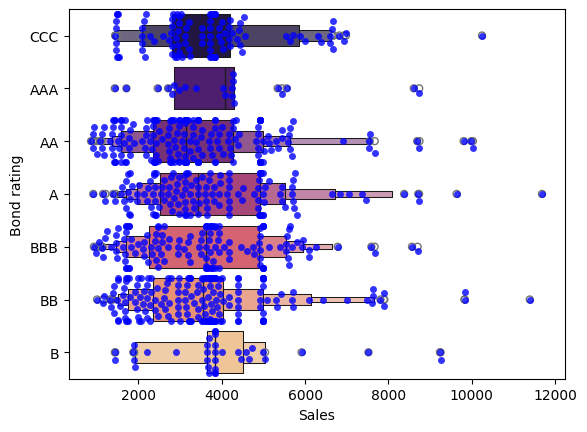

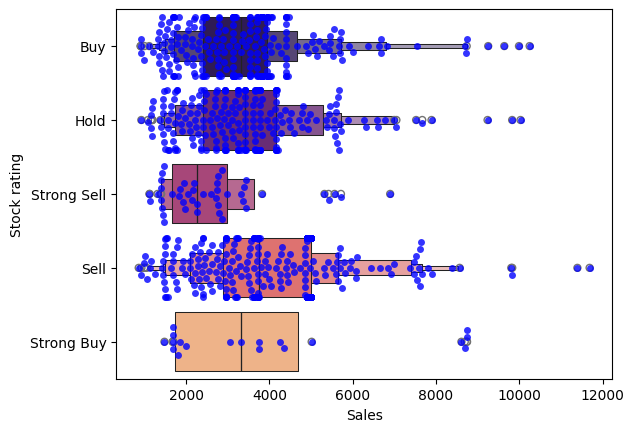

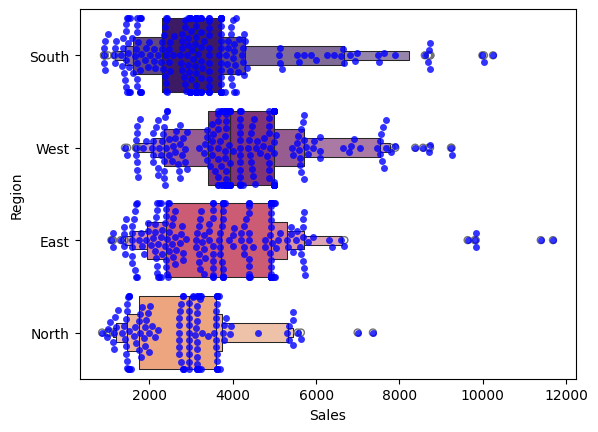

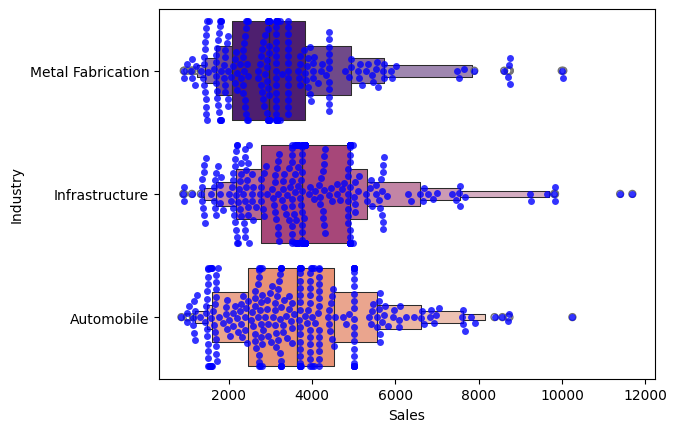

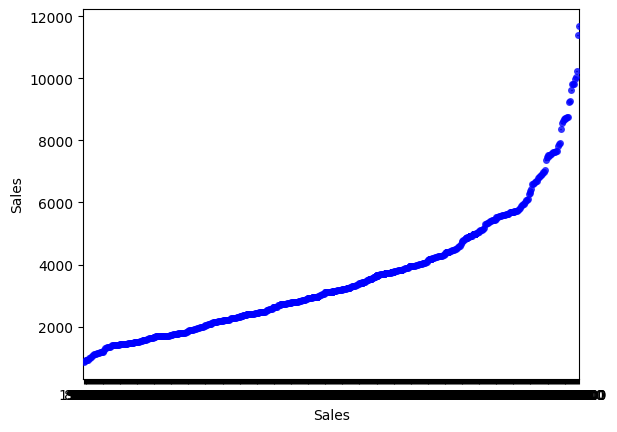

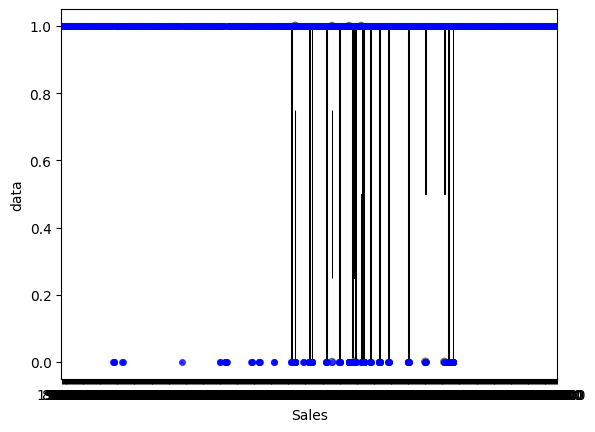

In [ ]:
for col in train:
  sns.swarmplot(x = train["Sales"], y = train[col], color = "blue", alpha = 0.8)
  sns.boxenplot(x = train["Sales"], y = train[col], palette ="magma")
  #plt.savefig(f"charts/{col}_boxplot.png")
  plt.show()

## Compute the correlation matrix

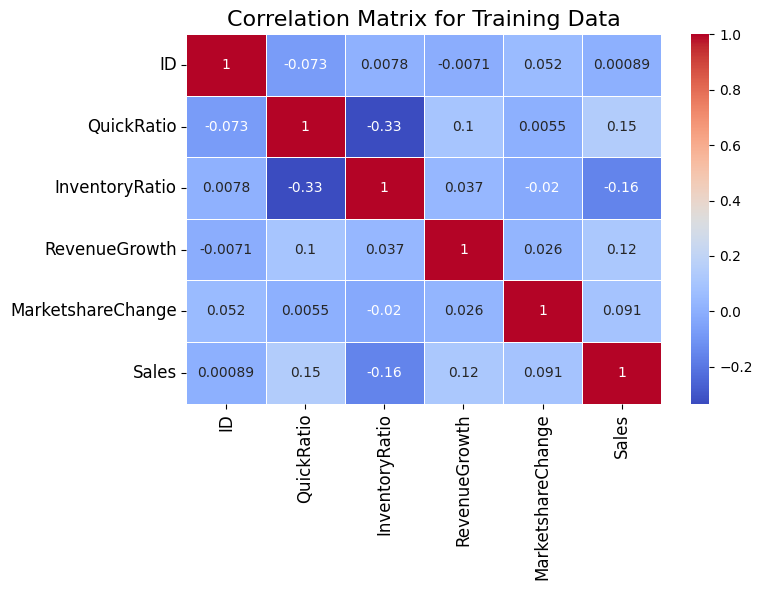

In [ ]:
corr_matrix = train.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, linewidths=0.5)
plt.title("Correlation Matrix for Training Data", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
#plt.savefig(f"charts/corr_plot.png")
plt.show()

In [ ]:
corr_matrix['Sales']

ID                   0.000889
QuickRatio           0.145986
InventoryRatio      -0.156772
RevenueGrowth        0.118716
MarketshareChange    0.090985
Sales                1.000000
Name: Sales, dtype: float64

# Data Preprocessing

## Define numerical and categorical features

In [ ]:
#train.select_dtypes(include=['int64','float64']).columns
numerical_features =['QuickRatio', 'InventoryRatio', 'RevenueGrowth','MarketshareChange']
#train.select_dtypes(include=['object']).columns
categorical_features = ['Company', 'Quarter', 'Bond rating', 'Stock rating', 'Region','Industry']

## Split data into input (X) and output (y) variables


In [ ]:
X = train.drop(['Sales'], axis=1)
y = train['Sales']

## Split data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Preprocessing pipeline


In [ ]:
numerical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('onehot_encoder', OneHotEncoder(sparse=False, handle_unknown='ignore'))
    ])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Modeling, Evaluation

### Model Pipeline

In [ ]:
def train_evaluate_model(model, X_train, X_test, y_train, y_test, preprocessor):
    pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('model', model)
    ])

    # Training the model
    pipeline.fit(X_train, y_train)

    # Predicting on the test set
    y_pred = pipeline.predict(X_test)

    # Calculating evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    explained_variance = explained_variance_score(y_test, y_pred)
    rmse = np.sqrt(mse)

    return mse,mae, r2,explained_variance,rmse

### Define models and fit and evaluate on the data

In [ ]:
# Define regressors
lin_reg = LinearRegression()
lasso_reg = Lasso()
ridge_reg = Ridge()
gradient_boosting_reg = GradientBoostingRegressor()
adaboost_reg = AdaBoostRegressor()
rf_reg = RandomForestRegressor()
xgb_reg = XGBRegressor()
svm_reg = SVR()
knn_reg = KNeighborsRegressor()
decision_tree_reg = DecisionTreeRegressor()
extra_trees_reg = ExtraTreesRegressor()
sgd_reg = SGDRegressor()
bagging_reg = BaggingRegressor()
hist_gradient_boosting_reg = HistGradientBoostingRegressor()
kernel_ridge_reg = KernelRidge()
mlp_reg = MLPRegressor()

models = {
    'Linear Regression': lin_reg,
    'Lasso Regression': lasso_reg,
    'Ridge Regression': ridge_reg,
    'Gradient Boosting': gradient_boosting_reg,
    'AdaBoost': adaboost_reg,
    'Random Forest': rf_reg,
    'XGBoost': xgb_reg,
    'SVR': svm_reg,
    'K-Nearest Neighbors': knn_reg,
    'Decision Tree': decision_tree_reg,
    'Extra Trees': extra_trees_reg,
    'SGD Regressor': sgd_reg,
    'Bagging Regressor': bagging_reg,
    'HistGradientBoostingRegressor': hist_gradient_boosting_reg,
    'MLP Regressor': mlp_reg,
    'Kernel Ridge Regression': kernel_ridge_reg
}

### Train the Single Models

In [ ]:
results = []

for name, model in models.items():
    mse,mae, r2,explained_variance,rmse= train_evaluate_model(model, X_train, X_test, y_train, y_test, preprocessor)
    results.append([name, mae, mse, r2,explained_variance,rmse])

# Sort results based on Mean Absolute Error
results.sort(key=lambda x: x[1])
headers = ["Model", "Mean Absolute Error", "Mean Squared Error", "R2 Score", "Explained Variance Score","RMSE"]
print(tabulate(results, headers=headers, tablefmt="pretty"))

+-------------------------------+---------------------+--------------------+----------------------+--------------------------+--------------------+
|             Model             | Mean Absolute Error | Mean Squared Error |       R2 Score       | Explained Variance Score |        RMSE        |
+-------------------------------+---------------------+--------------------+----------------------+--------------------------+--------------------+
|            XGBoost            |  900.874474516369   | 1608945.0185613933 |  0.6736484063520073  |    0.6800311969730277    | 1268.4419649954007 |
|          Extra Trees          |  972.0088571428573  | 1939846.2069476193 |  0.6065298106734447  |    0.6187293569121233    | 1392.7836181358607 |
|         Random Forest         |  974.7092380952382  | 1895728.6854599998 |  0.6154784218933345  |    0.6158940240643271    | 1376.8546348325954 |
|       Lasso Regression        |  986.9423550026739  | 1606298.3721877346 |  0.6741852408938356  |    0.6797689

### Train the combination of models

In [ ]:
# Top 5 model for single run
models = {
    'XGBoost': xgb_reg,
    'Extra Trees': extra_trees_reg,
    'Linear Regression': lin_reg,
    'Lasso Regression': lasso_reg,
    'Random Forest': rf_reg,

}

In [ ]:
combinations_list = []

for r in range(2, len(list(models.items())) + 1):
    combinations_list.extend(combinations(list(models.items()), r))

results = []

for combo in combinations_list:
    model_names, selected_models = zip(*combo)
    combined_model_name = " + ".join(model_names)
    estimators = list(zip(model_names, selected_models))

    # Create a VotingRegressor with selected models
    combined_model = VotingRegressor(estimators=estimators)

    # Train and evaluate the combined model
    mse, mae, r2, explained_variance,rmse = train_evaluate_model(combined_model, X_train, X_test, y_train, y_test, preprocessor)
    results.append([combined_model_name, mae, mse, r2, explained_variance,rmse])

# Sort results based on Mean Absolute Error
results.sort(key=lambda x: x[1])
headers = ["Model Combination", "Mean Absolute Error", "Mean Squared Error", "R2 Score", "Explained Variance Score","RMSE"]
print(tabulate(results, headers=headers, tablefmt="pretty"))

+------------------------------------------------------------------------------+---------------------+--------------------+--------------------+--------------------------+--------------------+
|                              Model Combination                               | Mean Absolute Error | Mean Squared Error |      R2 Score      | Explained Variance Score |        RMSE        |
+------------------------------------------------------------------------------+---------------------+--------------------+--------------------+--------------------------+--------------------+
|                            XGBoost + Extra Trees                             |  882.005341424851   | 1624361.723202372  | 0.6705213472727092 |    0.680410376759216     | 1274.5045010522215 |
|           XGBoost + Extra Trees + Lasso Regression + Random Forest           |  885.0360410046023  | 1548624.7381436466 | 0.685883516574249  |    0.6915552550360268    | 1244.4375187785229 |
|                  XGBoost + Extra 

# Optimization

### Define ensemble model using VotingRegressor


In [ ]:
model = Pipeline([
    ('preprocessing', preprocessor),
    ('voting_regressor', VotingRegressor([
        ('xgboost', XGBRegressor()),
        ('extra_trees', ExtraTreesRegressor())
    ]))
])

### Hyperparameter tuning using GridSearchCV with cross-validation and regularization


In [ ]:
param_distributions = {
    'voting_regressor__xgboost__n_estimators': [100, 300, 500],
    'voting_regressor__xgboost__learning_rate': [0.01, 0.1, 0.3],
    'voting_regressor__extra_trees__n_estimators': [100, 300, 500],
    'voting_regressor__extra_trees__max_depth': [None, 10, 20]
}


scoring = 'neg_mean_absolute_error'
cv = KFold(n_splits=20, shuffle=True, random_state=42)
search = RandomizedSearchCV(model, param_distributions, n_iter=10, cv=cv, scoring=scoring, n_jobs=-1, random_state=42)

### Get the best estimator


In [ ]:
search.fit(X_train, y_train)
best_model = search.best_estimator_
best_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['QuickRatio',
                                                   'InventoryRatio',
                                                   'RevenueGrowth',
                                                   'MarketshareChange']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Company', 'Quarter',
                                                   'Bond rating',
                                                   'Stoc...
                                                           interaction_constraints=None,
                                                           learning_rate=0.1,
                                                           max_bin=None,
                                                           max_cat_threshold=None,
                                                           max_cat_to_onehot=None,
                                                           max_delta_step=None,
                                                           max_depth=None,
                                                           max_leaves=None,
                                                           min_child_weight=None,
                                                           missing=nan,
                                                           monotone_constraints=None,
                                                           multi_strategy=None,
                                                           n_estimators=300,
                                                           n_jobs=None,
                                                           num_parallel_tree=None,
                                                           random_state=None, ...)),
                                             ('extra_trees',
                                              ExtraTreesRegressor())]))])

#  Predicting on the test set with Best Model

In [ ]:
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 883.0051922084263


# Make predictions on the test data



In [ ]:
y_test_pred = best_model.predict(test)
submission=pd.DataFrame({'id':np.array(test['ID']),'Sales':y_test_pred})
submission.to_csv('submission.csv',index=False)

In [ ]:
submission

,id,Sales
0,7,2591.628687
1,8,2294.053433
2,16,4253.598623
3,17,3990.118125
4,25,4593.407988
...,...,...
145,656,4595.856309
146,664,2741.754824
147,665,3456.483994
148,673,2960.032261


# Deep Learning Model

In [ ]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (420, 11)
Shape of X_test: (105, 11)
Shape of y_train: (420,)
Shape of y_test: (105,)


### BiLSTM-CNN-Attention model

In [ ]:
# Attention mechanism for 3D data
def attention_3d_block(inputs):
    a = Dense(inputs.shape[1], activation='softmax')(Permute((2, 1))(inputs))
    return concatenate([inputs, Permute((2, 1))(a)], axis=1)

# Training and evaluating BiLSTM-CNN-Attention model
def train_evaluate_bilstm_cnn_attention(X_train, X_test, y_train, y_test,preprocessor=preprocessor):
    X_train = X_train.sort_values(by=['Company', 'Quarter'])
    X_test = X_test.sort_values(by=['Company', 'Quarter'])
    X_train = preprocessor.fit_transform(X_train)
    X_test = preprocessor.transform(X_test)
    X_train_lstm = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_test_lstm = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    X_train_cnn = np.expand_dims(X_train, axis=2)
    X_test_cnn = np.expand_dims(X_test, axis=2)

    # Define LSTM model with attention
    inputs_lstm = Input(shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]))
    lstm_out = Bidirectional(LSTM(128, return_sequences=True))(inputs_lstm)
    attention_mul = attention_3d_block(lstm_out)
    output_lstm = Dropout(0.5)(Flatten()(attention_mul))
    output_lstm = Dense(64, activation='relu')(output_lstm)

    # Define CNN model
    inputs_cnn = Input(shape=(X_train_cnn.shape[1], X_train_cnn.shape[2]))
    cnn_out = GlobalMaxPooling1D()(Conv1D(filters=64, kernel_size=3, activation='relu')(MaxPooling1D(pool_size=2)(Conv1D(filters=64, kernel_size=3, activation='relu')(inputs_cnn))))
    output_cnn = Dropout(0.5)(Dense(64, activation='relu')(cnn_out))

    # Merge LSTM and CNN models
    merged = concatenate([output_lstm, output_cnn])

    # Merge dense layers
    merged = Dense(64, activation='relu')(merged)
    output = Dense(1)(merged)

    # Create model
    model = Model(inputs=[inputs_lstm, inputs_cnn], outputs=output)
    model.compile(loss='mean_absolute_error', optimizer='adam')

    # Early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='min', restore_best_weights=True)

    # Train the model
    history = model.fit([X_train_lstm, X_train_cnn], y_train, epochs=100, batch_size=16, verbose=1, callbacks=[early_stopping], validation_split=0.4)

    # Predict on the test set
    y_pred = model.predict([X_test_lstm, X_test_cnn])

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    explained_variance = explained_variance_score(y_test, y_pred)
    rmse = np.sqrt(mse)

    return mse, mae, r2, explained_variance, rmse

In [ ]:
mse, mae, r2, explained_variance, rmse = train_evaluate_bilstm_cnn_attention(X_train, X_test, y_train, y_test)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R^2) Score:", r2)
print("Explained Variance:", explained_variance)
print("Root Mean Squared Error (RMSE):", rmse)

Epoch 1/100
16/16 [==============================] - 11s 300ms/step - loss: 3474.9937 - val_loss: 2746.5837
Epoch 2/100
16/16 [==============================] - 5s 321ms/step - loss: 1962.8402 - val_loss: 1647.5530
Epoch 3/100
16/16 [==============================] - 4s 263ms/step - loss: 1592.9169 - val_loss: 1510.8180
Epoch 4/100
16/16 [==============================] - 4s 231ms/step - loss: 1536.8375 - val_loss: 1511.5156
Epoch 5/100
16/16 [==============================] - 5s 302ms/step - loss: 1530.0233 - val_loss: 1521.6624
Epoch 6/100
16/16 [==============================] - 5s 314ms/step - loss: 1537.8279 - val_loss: 1514.2135
Epoch 6: early stopping
4/4 [==============================] - 1s 82ms/step
Mean Absolute Error (MAE): 1632.9065871465773
Mean Squared Error (MSE): 5177344.8170006005
R-squared (R^2) Score: -0.05015069651297033
Explained Variance: -0.00033700953938953226
Root Mean Squared Error (RMSE): 2275.3779503635437


### BiLSTM-CNN-Attention model with l2 Regularizer

In [ ]:
# Attention mechanism for 3D data
def attention_3d_block(inputs):
    a = Dense(inputs.shape[1], activation='softmax', kernel_regularizer=l2(0.01))(Permute((2, 1))(inputs))
    return concatenate([inputs, Permute((2, 1))(a)], axis=1)

# Training and evaluating BiLSTM-CNN-Attention model
def train_evaluate_bilstm_cnn_attention_reg(X_train, X_test, y_train, y_test,preprocessor=preprocessor):
    X_train = X_train.sort_values(by=['Company', 'Quarter'])
    X_test = X_test.sort_values(by=['Company', 'Quarter'])
    X_train = preprocessor.fit_transform(X_train)
    X_test = preprocessor.transform(X_test)
    X_train_lstm = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_test_lstm = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    X_train_cnn = np.expand_dims(X_train, axis=2)
    X_test_cnn = np.expand_dims(X_test, axis=2)

    # Define LSTM model with attention
    inputs_lstm = Input(shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]))
    lstm_out = Bidirectional(LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))(inputs_lstm)
    attention_mul = attention_3d_block(lstm_out)
    output_lstm = Dropout(0.5)(Flatten()(attention_mul))
    output_lstm = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(output_lstm)

    # Define CNN model
    inputs_cnn = Input(shape=(X_train_cnn.shape[1], X_train_cnn.shape[2]))
    cnn_out = GlobalMaxPooling1D()(Conv1D(filters=64, kernel_size=3, activation='relu')(MaxPooling1D(pool_size=2)(Conv1D(filters=64, kernel_size=3, activation='relu')(inputs_cnn))))
    output_cnn = Dropout(0.5)(Dense(64, activation='relu', kernel_regularizer=l2(0.01))(cnn_out))

    # Merge LSTM and CNN models
    merged = concatenate([output_lstm, output_cnn])

    # Merge dense layers
    merged = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(merged)
    output = Dense(1, kernel_regularizer=l2(0.01))(merged)

    # Create model
    model = Model(inputs=[inputs_lstm, inputs_cnn], outputs=output)
    model.compile(loss='mean_absolute_error', optimizer='adam')

    # Early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min', restore_best_weights=True)

    # Train the model
    history = model.fit([X_train_lstm, X_train_cnn], y_train, epochs=100, batch_size=2, verbose=1, callbacks=[early_stopping], validation_split=0.4)

    # Predict on the test set
    y_pred = model.predict([X_test_lstm, X_test_cnn])

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    explained_variance = explained_variance_score(y_test, y_pred)
    rmse = np.sqrt(mse)

    return mse, mae, r2, explained_variance, rmse

In [ ]:
mse, mae, r2, explained_variance, rmse = train_evaluate_bilstm_cnn_attention_reg(X_train, X_test, y_train, y_test)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R^2) Score:", r2)
print("Explained Variance:", explained_variance)
print("Root Mean Squared Error (RMSE):", rmse)

Epoch 1/100
126/126 [==============================] - 73s 532ms/step - loss: 1953.5631 - val_loss: 1553.4475
Epoch 2/100
126/126 [==============================] - 57s 455ms/step - loss: 1575.2317 - val_loss: 1619.2603
Epoch 3/100
126/126 [==============================] - 58s 463ms/step - loss: 1564.3127 - val_loss: 1536.1604
Epoch 4/100
126/126 [==============================] - 58s 461ms/step - loss: 1554.8920 - val_loss: 1579.4702
Epoch 5/100
126/126 [==============================] - 57s 454ms/step - loss: 1556.5638 - val_loss: 1527.2042
Epoch 6/100
126/126 [==============================] - 63s 501ms/step - loss: 1566.3934 - val_loss: 1626.1995
Epoch 7/100
126/126 [==============================] - 57s 454ms/step - loss: 1534.5665 - val_loss: 1581.9070
Epoch 8/100
126/126 [==============================] - 57s 452ms/step - loss: 1569.8365 - val_loss: 1509.2253
Epoch 9/100
126/126 [==============================] - 57s 455ms/step - loss: 1543.6893 - val_loss: 1566.2018
Epoch 10/1

# Probabilistic Models for Regression

In [ ]:
# Top probabilistic model
models = {
    'Gaussian Process Regression': GaussianProcessRegressor(kernel=C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2)), n_restarts_optimizer=10),
    'Bayesian Ridge Regression': BayesianRidge(),
    'Passive Aggressive Regressor': PassiveAggressiveRegressor(),
    'Theil-Sen Regressor': TheilSenRegressor(),
    'RANSAC Regressor': RANSACRegressor(),
    'Huber Regressor': HuberRegressor(),
    'Tweedie Regressor': TweedieRegressor(),
    'Poisson Regressor': PoissonRegressor(),
    'Gamma Regressor': GammaRegressor()
}

In [ ]:
results = []

for name, model in models.items():
    mse,mae, r2,explained_variance,rmse= train_evaluate_model(model, X_train, X_test, y_train, y_test, preprocessor)
    results.append([name, mae, mse, r2,explained_variance,rmse])

# Sort results based on Mean Absolute Error
results.sort(key=lambda x: x[1])
headers = ["Model", "Mean Absolute Error", "Mean Squared Error", "R2 Score", "Explained Variance Score","RMSE"]
print(tabulate(results, headers=headers, tablefmt="pretty"))

+------------------------------+---------------------+-----------------------+------------------------+--------------------------+--------------------+
|            Model             | Mean Absolute Error |  Mean Squared Error   |        R2 Score        | Explained Variance Score |        RMSE        |
+------------------------------+---------------------+-----------------------+------------------------+--------------------------+--------------------+
|       Huber Regressor        |  914.2481308789678  |  1922316.2357407762   |   0.610085515793233    |    0.6231338542165619    | 1386.4761937158446 |
|      Poisson Regressor       |  958.2518343900283  |  1543797.1743041896   |   0.6868627191786071   |    0.6934653132536717    | 1242.4963478031593 |
|  Bayesian Ridge Regression   | 1011.9760737452812  |  1699734.9467490313   |   0.655232961815739    |    0.6586795879571997    | 1303.7388337964899 |
| Passive Aggressive Regressor | 1020.8863379505328  |  2361018.2417589957   |   0.52110

In [ ]:
# Top probabilistic model
models = {
    'Bayesian Ridge Regression': BayesianRidge(),
    'Huber Regressor': HuberRegressor(),
    'Poisson Regressor': PoissonRegressor(),
}

In [ ]:
combinations_list = []

for r in range(2, len(list(models.items())) + 1):
    combinations_list.extend(combinations(list(models.items()), r))

results = []

for combo in combinations_list:
    model_names, selected_models = zip(*combo)
    combined_model_name = " + ".join(model_names)
    estimators = list(zip(model_names, selected_models))

    # Create a VotingRegressor with selected models
    combined_model = VotingRegressor(estimators=estimators)

    # Train and evaluate the combined model
    mse, mae, r2, explained_variance,rmse = train_evaluate_model(combined_model, X_train, X_test, y_train, y_test, preprocessor)
    results.append([combined_model_name, mae, mse, r2, explained_variance,rmse])

# Sort results based on Mean Absolute Error
results.sort(key=lambda x: x[1])
headers = ["Model Combination", "Mean Absolute Error", "Mean Squared Error", "R2 Score", "Explained Variance Score","RMSE"]
print(tabulate(results, headers=headers, tablefmt="pretty"))

+-----------------------------------------------------------------+---------------------+--------------------+--------------------+--------------------------+--------------------+
|                        Model Combination                        | Mean Absolute Error | Mean Squared Error |      R2 Score      | Explained Variance Score |        RMSE        |
+-----------------------------------------------------------------+---------------------+--------------------+--------------------+--------------------------+--------------------+
|               Huber Regressor + Poisson Regressor               |  931.1658681929066  | 1637710.1968568899 | 0.6678137994077018 |    0.6773674613715336    | 1279.7305172796694 |
|           Bayesian Ridge Regression + Huber Regressor           |  949.1413873345477  | 1713414.1379327201 | 0.6524583326077105 |    0.6599351598018028    | 1308.974460382142  |
| Bayesian Ridge Regression + Huber Regressor + Poisson Regressor |  949.5934081399139  | 1627887.76

# Combine the Probabilistic Models and Normal Models

In [ ]:
# Top model with MAE < 960
models = {
    'Huber Regressor': HuberRegressor(),
    'Poisson Regressor': PoissonRegressor(),
    'XGBoost': xgb_reg,
    'Extra Trees': extra_trees_reg,
}

In [ ]:
combinations_list = []

for r in range(2, len(list(models.items())) + 1):
    combinations_list.extend(combinations(list(models.items()), r))

results = []

for combo in combinations_list:
    model_names, selected_models = zip(*combo)
    combined_model_name = " + ".join(model_names)
    estimators = list(zip(model_names, selected_models))

    # Create a VotingRegressor with selected models
    combined_model = VotingRegressor(estimators=estimators)

    # Train and evaluate the combined model
    mse, mae, r2, explained_variance,rmse = train_evaluate_model(combined_model, X_train, X_test, y_train, y_test, preprocessor)
    results.append([combined_model_name, mae, mse, r2, explained_variance,rmse])

# Sort results based on Mean Absolute Error
results.sort(key=lambda x: x[1])
headers = ["Model Combination", "Mean Absolute Error", "Mean Squared Error", "R2 Score", "Explained Variance Score","RMSE"]
print(tabulate(results, headers=headers, tablefmt="pretty"))

+-------------------------------------------------------------+---------------------+--------------------+--------------------+--------------------------+--------------------+
|                      Model Combination                      | Mean Absolute Error | Mean Squared Error |      R2 Score      | Explained Variance Score |        RMSE        |
+-------------------------------------------------------------+---------------------+--------------------+--------------------+--------------------------+--------------------+
|                  Huber Regressor + XGBoost                  |  847.4875925475683  | 1494370.595073169  | 0.6968881971871936 |    0.7063090050922021    | 1222.4445161532565 |
|                 Poisson Regressor + XGBoost                 |  870.3778866591808  | 1393551.0478319747 | 0.7173380071766315 |    0.7238302344150453    | 1180.4876313761083 |
|        Huber Regressor + Poisson Regressor + XGBoost        |  872.6432438455869  | 1447496.547826864  | 0.70639593041

### Define ensemble model using VotingRegressor

In [ ]:
model = Pipeline([
    ('preprocessing', preprocessor),
    ('voting_regressor', VotingRegressor([
        ('huber', HuberRegressor()),
        ('xgboost', XGBRegressor()),
    ]))
])

## Predicting on the test set with Best Model

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 847.4875925475683


## Make predictions on the test data

In [ ]:
y_test_pred = best_model.predict(test)
submission=pd.DataFrame({'id':np.array(test['ID']),'Sales':y_test_pred})
submission.to_csv('submission_2.csv',index=False)
submission

,id,Sales
0,7,2558.105689
1,8,2423.661374
2,16,4033.534571
3,17,3879.914310
4,25,5133.879358
...,...,...
145,656,4837.086719
146,664,2779.661210
147,665,3283.354112
148,673,3072.901358
